In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sbn

/usr/local/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
query = """ 
    select dq.event_date, c.label, dq.close_value
    from company c
    inner join daily_quote dq on c.id = dq.company_id
    where c.label in (
        'CYRE3', 'BRKM5', 'RADL3', 'VVAR3', 'BBDC3', 'SBSP3', 'KROT3', 'EGIE3', 'ENBR3', 'NATU3')
    and (now() - dq.event_date) <= interval '3 months'
    order by dq.event_date;"""

In [3]:
conn = psycopg2.connect(
            database="postgres",
            user="postgres",
            connect_timeout=3,
            options='-c statement_timeout=3000')
raw_df = pd.read_sql(query, conn)
conn.close()

In [4]:
raw_df.columns = ['Data', 'Sigla', 'VF']
raw_df.set_index(['Data', 'Sigla'], inplace=True)

In [5]:
df = (raw_df.unstack()
      .replace({0: np.NaN})
      .fillna(method='ffill'))
df.head()

VF                                                           \
Sigla       BBDC3  BRKM5  CYRE3   EGIE3  ENBR3  KROT3  NATU3  RADL3  SBSP3   
Data                                                                         
2018-10-15  28.25  51.60  12.51  28.744  13.92  10.70  28.73  67.49  27.46   
2018-10-16  29.44  51.77  13.04  29.416  14.23  10.56  29.90  67.01  27.58   
2018-10-17  29.45  51.65  12.85  29.808  14.03  10.80  31.08  65.09  28.08   
2018-10-18  28.54  53.50  12.63  30.120  14.18  10.67  30.30  66.30  27.24   
2018-10-19  28.59  54.35  12.57  30.400  14.10  10.83  30.77  66.30  27.91   

                  
Sigla      VVAR3  
Data              
2018-10-15  4.74  
2018-10-16  4.79  
2018-10-17  4.71  
2018-10-18  4.50  
2018-10-19  4.54

In [6]:
columns = pd.Series(df.columns.levels[1].values)

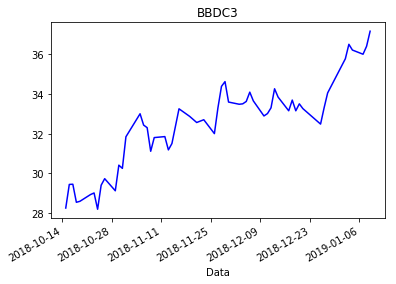

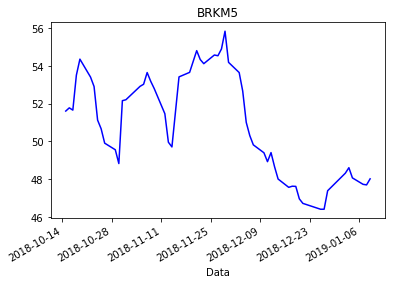

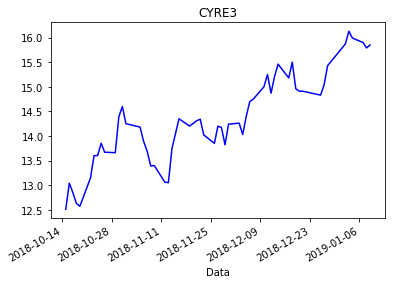

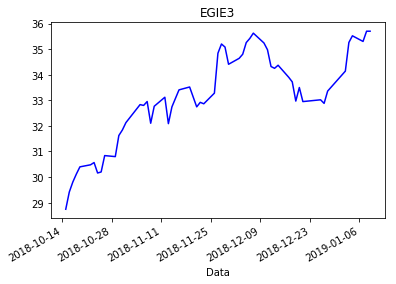

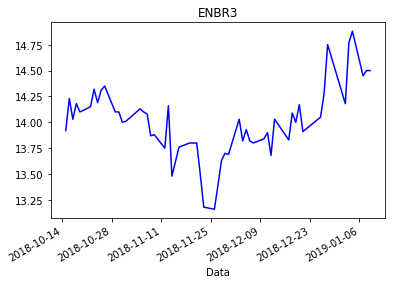

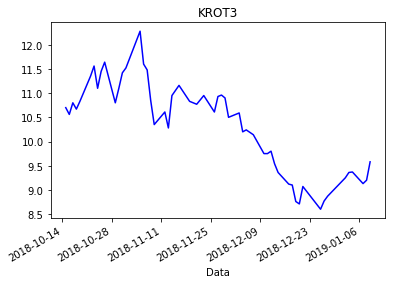

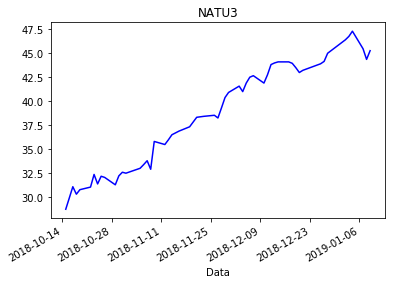

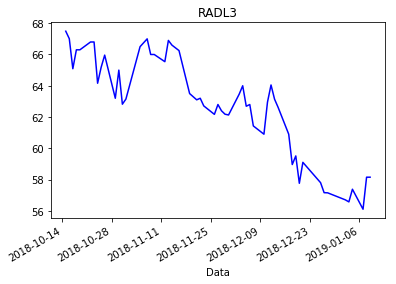

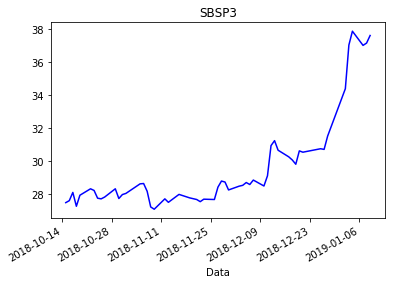

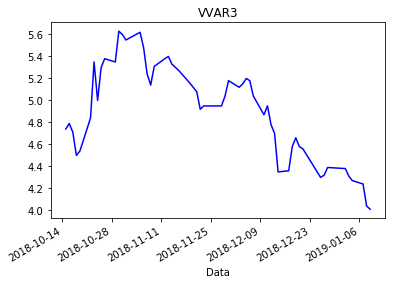

In [7]:
for label in df['VF']:
    fig = plt.figure()
    company = df['VF'][label]
    props = {
        'title': company.name
    }
    ax = fig.add_subplot(1, 1, 1)
    ax.label = company.name
    company.plot(ax=ax, style='b-')
    ax.set(**props)

In [8]:
# bbdc4 = df['VF']['BBDC4']
# x = bbdc4.index.values
# y = bbdc4.values
# fig = plt.figure()
# fig.add_sub_plots()
# ax.plot(x, y, 'k--')
# plt.show()

In [9]:
# bbdc4 = df['VF']['BBDC4']
# x = bbdc4.index.values
# y = bbdc4.values
# fig, ax = plt.subplots()
# ax.plot(x, y, 'k--')
# plt.show()

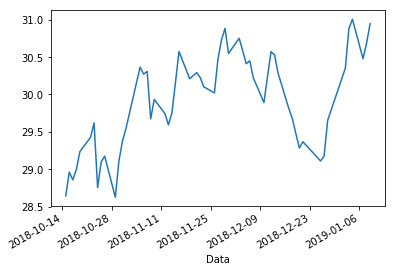

In [10]:

percentages = [(13, 'CYRE3'), (13, 'BRKM5'), (12, 'RADL3'), (11, 'VVAR3'), (9, 'BBDC3'), (9, 'SBSP3'), (9, 'KROT3'), (8, 'EGIE3'),
 (8, 'ENBR3'), (8, 'NATU3')]

virtual_portfolio = df.copy()
for (v, k) in percentages:
    virtual_portfolio['VF'][k] = virtual_portfolio['VF'][k] * v * 1.0/100.0

virtual_portfolio = np.sum(virtual_portfolio, axis=1)
virtual_portfolio.plot()
                    


In [15]:
initial_value = virtual_portfolio.iloc[0]
current_value = virtual_portfolio.iloc[len(virtual_portfolio) - 1]
profit = current_value - initial_value


2.3061800000000012
0.08051483577791654


# Lucro nominal e percentual

In [16]:
print('Lucro nominal=%s; Lucro percentual=%s' % (profit, profit/initial_value))

Lucro nominal=2.3061800000000012; Lucro percentual=0.08051483577791654
